## Eigenfaces

Mateo Andrés Manosalva AMaris

In [19]:
def plot_gallery(images, h, w, titles=np.array([]), n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles.shape[0] == n_row * n_col:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [20]:
olivetti_faces = fetch_olivetti_faces()
X_train = olivetti_faces['data']

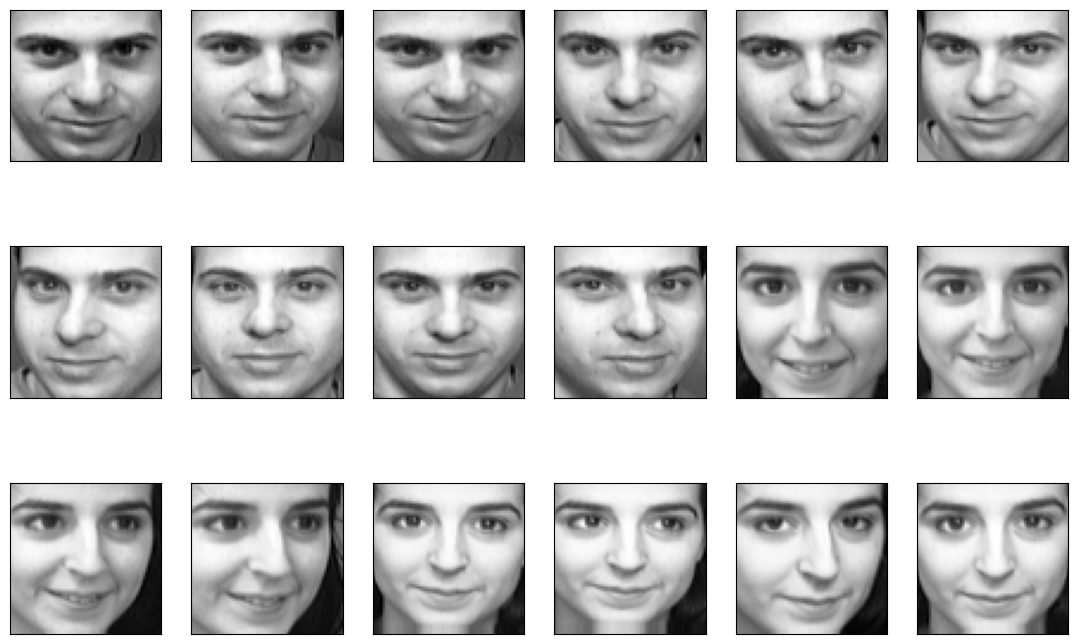

In [21]:
plot_gallery(olivetti_faces['images'][80:100], h=64, w=64,n_row=3, n_col=6)

In [22]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)


Extracting the top 150 eigenfaces from 400 faces


In [23]:
eigenfaces = pca.components_.reshape((n_components, 64, 64))
eigenfaces_vectors = pca.components_ 

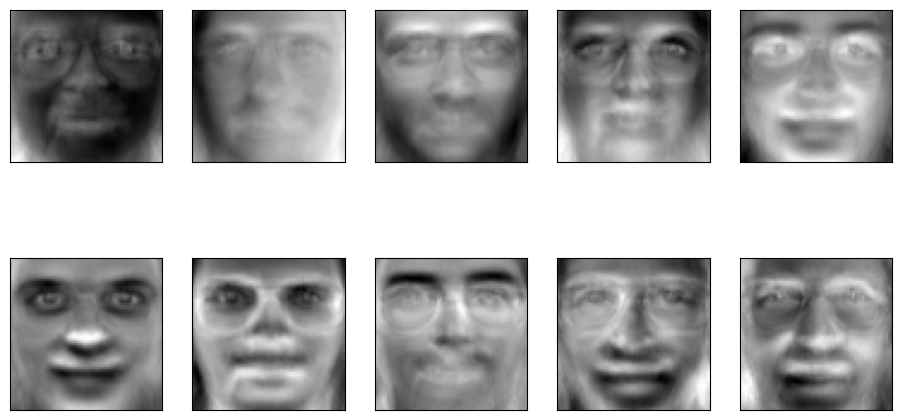

In [30]:
plot_gallery(eigenfaces, h=64, w=64,n_row=2, n_col=5)

In [25]:
img = cv2.imread("foto.jpg", cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (64, 64))
img_resized = img_resized/img_resized.max()
img_resized_vector = img_resized.reshape(1,-1)[0]

[]

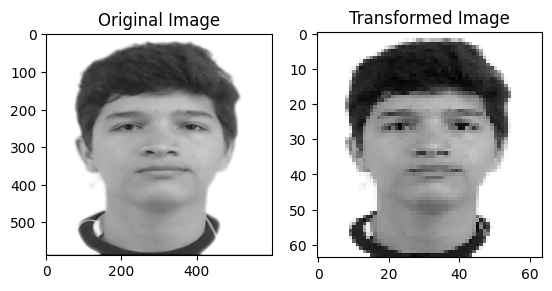

In [26]:
plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(img_resized,cmap=plt.cm.gray)
plt.title("Transformed Image")
plt.plot()


In [27]:
dot_product_list = []
for i in range(eigenfaces_vectors.shape[0]):
    dot_product_list.append([np.array([abs(np.dot(eigenfaces_vectors[i], img_resized_vector)), i])]) 
dot_product_list = np.array(dot_product_list)
dot_product_list = dot_product_list[:,0] 

eigen_faces_similar_to_me = dot_product_list[dot_product_list[:,0].argsort()][::-1][:10]
index_eigenfaces = eigen_faces_similar_to_me[:,1].astype(int)
percentage_similarity = np.round_(eigen_faces_similar_to_me[:,0]/sum(eigen_faces_similar_to_me[:,0])*100,decimals=4)

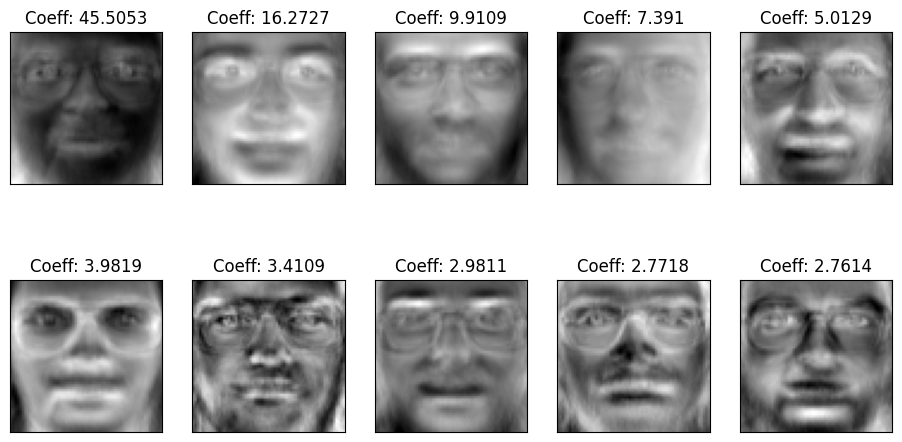

In [28]:
plot_gallery(eigenfaces[index_eigenfaces], h=64, w=64,titles=np.array(["Coeff: "+x for x in percentage_similarity.astype(str)]),n_row=2, n_col=5)